In [19]:
from sklearn.cluster import MeanShift, estimate_bandwidth, kmeans_plusplus
from sklearn.datasets import make_blobs  
from matplotlib import pyplot as plt 

In [20]:
clusters = [[6,6,6], [2,2,2], [3,9,9]]
X, y = make_blobs(centers = clusters, cluster_std = 0.60)
X = X[:, ::-1]

In [21]:
X

array([[ 5.19819019,  6.48359392,  6.65819957],
       [ 5.23453599,  6.66348161,  6.55364016],
       [ 2.38289761,  2.17767608,  2.08898997],
       [ 1.68817835,  1.51015879,  1.44615249],
       [ 9.3995761 ,  9.06457061,  2.99136543],
       [ 5.3686344 ,  5.60352666,  6.36980826],
       [ 8.9538914 ,  8.93002544,  3.79764732],
       [ 2.04862585,  0.89385586,  1.3169852 ],
       [ 2.03427358,  1.76392649,  2.4735039 ],
       [ 5.89237148,  6.30199064,  7.06461548],
       [ 1.70727671,  1.41325194,  3.04736592],
       [ 9.08741683,  9.15691722,  3.81847732],
       [ 9.26807044,  8.88350502,  2.52243944],
       [ 4.88092171,  4.84828672,  7.64807261],
       [ 2.24459817,  1.46758828,  1.95976005],
       [ 1.8261887 ,  1.3341088 ,  2.80309078],
       [ 9.56211354,  8.28245964,  2.31902244],
       [ 9.01611879,  9.1943636 ,  2.89374939],
       [ 1.6224098 ,  3.00046607,  1.64165313],
       [ 6.48410496,  6.14244559,  7.02659899],
       [ 5.71206748,  6.4925512 ,  6.662

In [22]:
# Calculate seeds from k-means++
centers_init, indices = kmeans_plusplus(X, n_clusters=3, random_state=0)

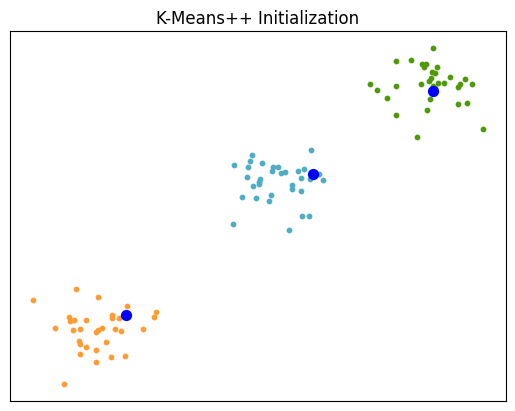

In [28]:
# Plot init seeds along side sample data
plt.figure(1)
colors = ["#4EACC5", "#FF9C34", "#4E9A06", "m"]
for k, col in enumerate(colors):
    cluster_data = y == k
    plt.scatter(X[cluster_data, 0], X[cluster_data, 1], c=col, marker=".", s=40)

plt.scatter(centers_init[:, 0], centers_init[:, 1], c="b", s=50)
plt.title("K-Means++ Initialization")
plt.xticks([])
plt.yticks([])
plt.show()

In [24]:
bandwidth = estimate_bandwidth(X, n_samples=500)
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
cluster_centers = meanshift.cluster_centers_

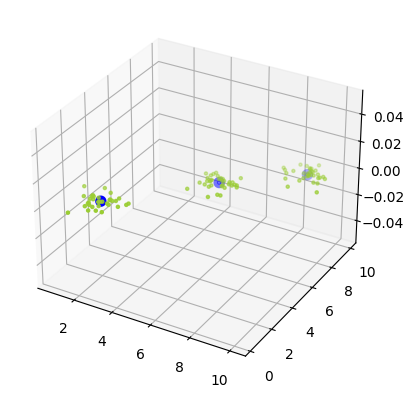

In [26]:
fig = plt.figure()
  
ax = fig.add_subplot(111, projection ='3d')
  
ax.scatter(X[:, 0], X[:, 1], marker ='.', color ="yellowgreen")
ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker ='o', color ='blue', s=10, linewidth=5,  
                                   zorder=10)
plt.show()